In [5]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
sys.path.append("../shared")

import bartolozziSPEED

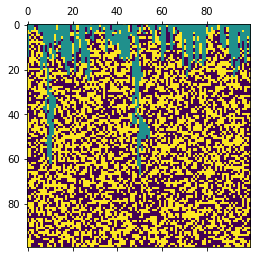

In [6]:
G, x = bartolozziSPEED.generate(.1,.1,.1,.1,100,100,1,1,1)

plt.matshow(G)